# Лабораторная работа 2

## Полносвязная нейронная сеть

### Выполнила Кривоконева Екатерина, группа 6233-010402D

Задание: Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.
Набор данных: CIFAR-10.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).

In [3]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [6]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 4.090896e-09
b1 max relative error: 2.738421e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017143643532923733


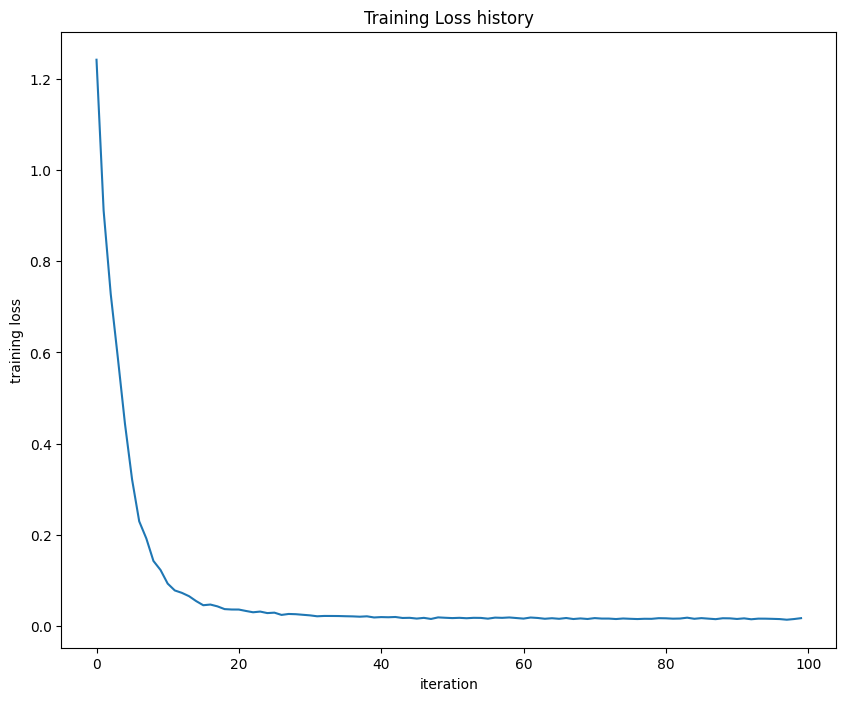

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [8]:
from scripts.data_utils import load_CIFAR10

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

num_train = 49000
num_test = 1000
num_val = 1000
num_dev = 500

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_val = X_train[num_train:(num_train+num_val)]
y_val = y_train[num_train:(num_train+num_val)]

X_train = X_train[0:num_train]
y_train = y_train[0:num_train]

y_test = y_test[0:num_test]
X_test = X_test[0:num_test]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print('Train image shape:    {0}'.format(X_train.shape))
print('Train label shape:    {0}'.format(y_train.shape))
print('Validate image shape: {0}'.format(X_val.shape))
print('Validate label shape: {0}'.format(y_val.shape))
print('Test image shape:     {0}'.format(X_test.shape))
print('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (49000, 3072)
Train label shape:    (49000,)
Validate image shape: (1000, 3072)
Validate label shape: (1000,)
Test image shape:     (1000, 3072)
Test label shape:     (1000,)


In [9]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302774
iteration 100 / 1000: loss 2.300636
iteration 200 / 1000: loss 2.255748
iteration 300 / 1000: loss 2.120721
iteration 400 / 1000: loss 2.091629
iteration 500 / 1000: loss 2.029904
iteration 600 / 1000: loss 2.033015
iteration 700 / 1000: loss 1.922706
iteration 800 / 1000: loss 1.951045
iteration 900 / 1000: loss 1.895186
Validation accuracy:  0.31


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков.

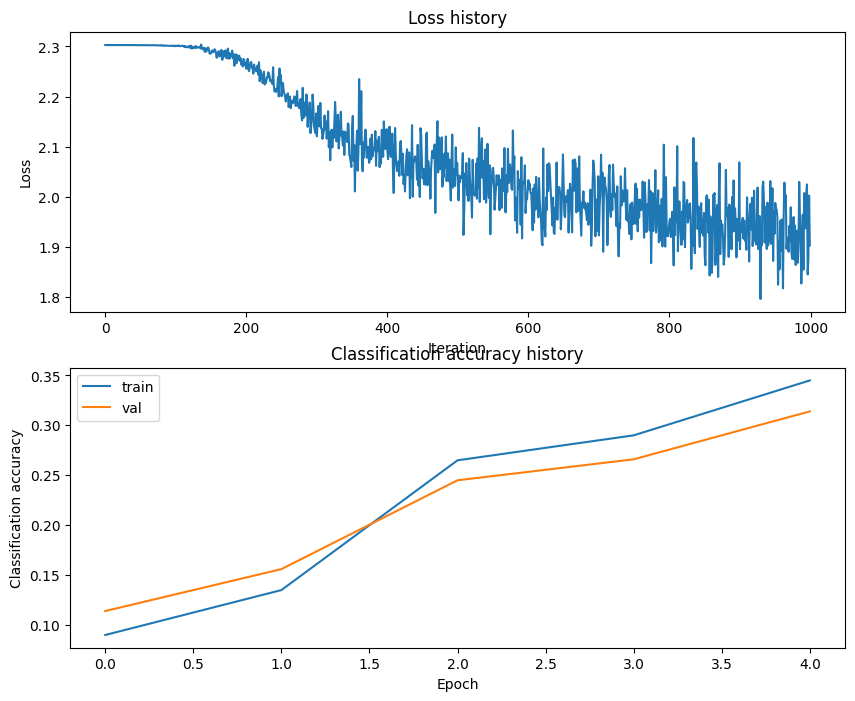

In [10]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [11]:
hidden_sizes = [80, 160, 320]
num_iters = 2000
batch_sizes = [200, 400, 800]
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
regularization_strengths = [1e-1, 1e-2, 1e-3, 1e-4]
best_val = -1
best_stats = None
best_params = None
best_net = None

for lr in learning_rates:
    for rs in regularization_strengths:
        for bs in batch_sizes:
            for hs in hidden_sizes:
                net = TwoLayerNet(input_size, hs, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=num_iters, batch_size=bs,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=rs)
                y_val_pred = net.predict(X_val)
                acc_val = np.mean(y_val == y_val_pred)
                print('learning rate: %e, reg: %e, batch size: %e, hidden size: %e, val accuracy: %f' % (lr, rs, bs, hs, acc_val))
                if best_val < acc_val:
                    best_stats = stats
                    best_val = acc_val
                    best_net = net
                    best_params = {'learning_rate': lr, 'reg': rs, 'batch_size': bs, 'hidden_size': hs}

print('Best validation accuracy achieved during cross-validation: %f' % best_val)
print('Best params: %s' % best_params)

D:\Магистратура\3 семестр\DL_Course_SamU-master\lab_1-2\scripts\classifiers\neural_net.py:114: RuntimeWarning: divide by zero encountered in log
  correct_log_probs = -np.log(a2[range(N), y])


learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 2.000000e+02, hidden size: 8.000000e+01, val accuracy: 0.079000


D:\Магистратура\3 семестр\DL_Course_SamU-master\lab_1-2\scripts\classifiers\neural_net.py:111: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
D:\Магистратура\3 семестр\DL_Course_SamU-master\lab_1-2\scripts\classifiers\neural_net.py:112: RuntimeWarning: invalid value encountered in divide
  a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 2.000000e+02, hidden size: 1.600000e+02, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 2.000000e+02, hidden size: 3.200000e+02, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 4.000000e+02, hidden size: 8.000000e+01, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 4.000000e+02, hidden size: 1.600000e+02, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 4.000000e+02, hidden size: 3.200000e+02, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 8.000000e+02, hidden size: 8.000000e+01, val accuracy: 0.079000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 8.000000e+02, hidden size: 1.600000e+02, val accuracy: 0.087000
learning rate: 1.000000e-01, reg: 1.000000e-01, batch size: 8.000000e+02, hidden size: 3.200000e+02, val accuracy: 0.087000
learning

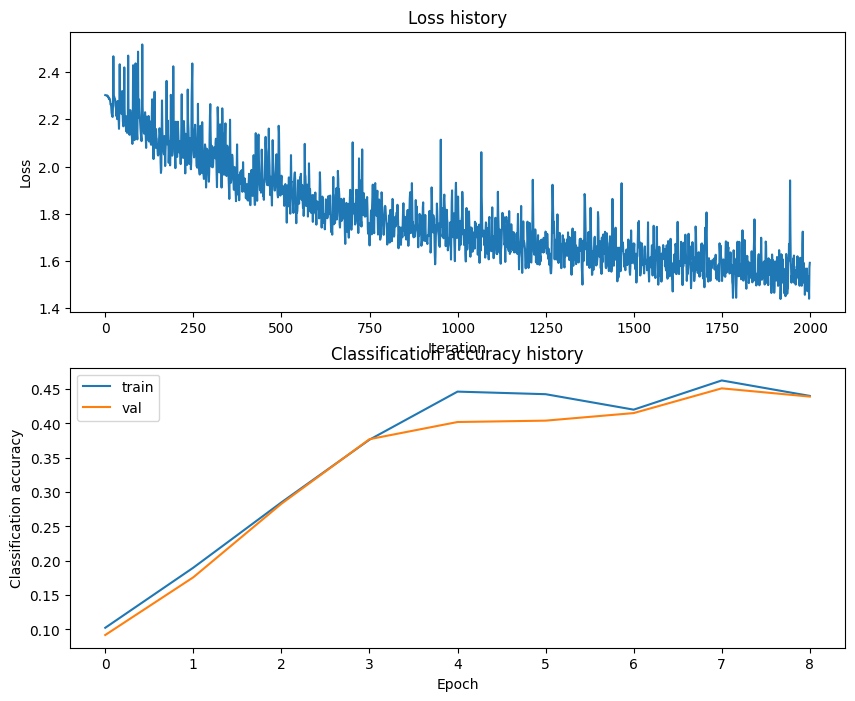

In [12]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

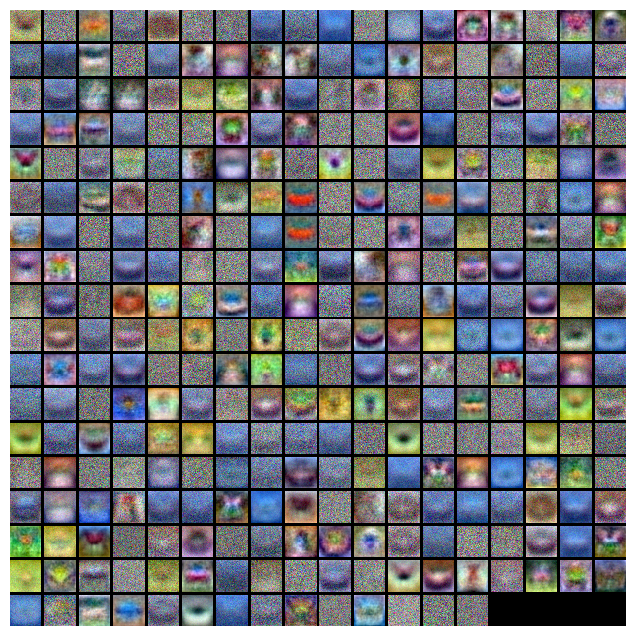

In [14]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(best_net)

Сделайте выводы по результатам работы.

В ходе экспериментов удалось выяснить, что наибольший validation accuracy достигается при значениях параметров learning_rate = 0.001, reg = 0.001, batch_size = 800, hidden_size = 320.